# 2.9.3. Ejemplo de la función atan2

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Marzo 16, 2023 | Conversión de código de MAXIMA a Python|



In [6]:
import numpy as np
import matplotlib.pyplot as plt

Es posible verificar que si tenemos un punto de coordenadas (1,1), se ubicará en el primer cuadrante del plano cartesiano, y si trazamos el vector que representa este forma un ángulo de 45° respecto al eje x. Lo podemos calcular como $$\tan(\theta) = \left(\frac{1}{1}\right) \rightarrow \theta = \arctan\left(\frac{1}{1}\right) = 45^{\circ}$$

In [4]:
x = 1
y = 1
t = np.arctan(y/x)      # Este cálculo se hace en radianes
np.rad2deg(t)

45.0

Por el contrario, si tomamos el punto $(-1, -1)$, su vector estará ubicado en el tercer cuadrante. ¿cuál es el ángulo que forma con el eje x? $$\tan(\theta) = \left(\frac{1}{1}\right) \rightarrow \theta = \arctan\left(\frac{1}{1}\right) = 45^{\circ}?$$

In [5]:
np.rad2deg( np.arctan( (-y)/(-x) ))

45.0

Lo cual no tiene sentido. Veamos el gráfico de esta situación.

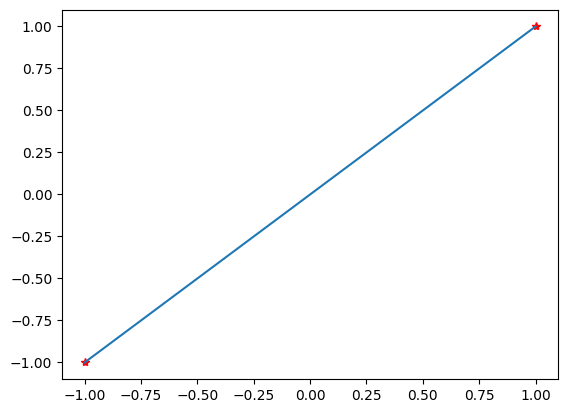

In [8]:
plt.figure()
# Dibujo los puntos
plt.plot(x, y, "*r")
plt.plot(-x, -y, "*r")
# Dibujo los vetores
plt.plot((-x, x),(-y, y))
# Dibujo los ejes
plt.axvline(x=0)
plt.axhline(y=0)
plt.show()

In [2]:
# Definamos un estado de esfuerzos [Pa]
sx  = 3 
sy  = -2
txy = 1

In [5]:
# Calculemos las direcciones principales para este estado de esfuerzos (tau_n=0).
ang_2t1 = np.arctan2(+txy, +(sx -sy)/2).round(2)
ang_2t2 = np.arctan2(-txy, -(sx -sy)/2).round(2)

# Recordemos que lo trabaja como radianes
ang_2t1, ang_2t2 

(0.38, -2.76)

In [18]:
# Si calculamos simplemente la arcotangente
i_ang_2t1 = np.arctan( +txy / (+(sx -sy)/2) ).round(2)
i_ang_2t2 = np.arctan( -txy / (-(sx -sy)/2) ).round(2)

# Recordemos que lo trabaja como radianes
i_ang_2t1, i_ang_2t2 

(0.38, 0.38)

In [7]:
np.rad2deg(ang_2t1), np.rad2deg(ang_2t2)

(21.772396214971284, -158.1363514561072)

In [10]:
np.rad2deg(ang_2t1) - 180

-158.22760378502872

In [11]:
# Calculemos las direcciones principales para este estado de esfuerzos (tau_n=0).
ang_2t1c = np.arctan2(-(sx -sy)/2, +txy, ).round(2)
ang_2t2c = np.arctan2(+(sx -sy)/2, -txy, ).round(2)

# Recordemos que lo trabaja como radianes
ang_2t1c, ang_2t2c 

(-1.19, 1.95)

In [12]:
np.rad2deg(ang_2t1c), np.rad2deg(ang_2t2c)

(-68.18197762056796, 111.72677005051052)

In [16]:
# Verificamos

# ang_2t1c = ang_2t1 + 180
ang_2t2 - ang_2t1 - np.pi

-4.710796326794896